Download and extract files
https://www.kaggle.com/datasets/gpiosenka/70-dog-breedsimage-data-set

In [6]:
import zipfile

zip_path = r"..\..\data\raw\dataset_2\archive.zip"  

extract_path = r"..\..\data\raw\dataset_2"  

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)


In [7]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import cv2
import random

In [29]:
# Load in dataset
train_dir = r"..\..\data\raw\dataset_2\train" 
data_df = pd.read_csv(r"..\..\data\raw\dataset_2\dogs.csv" )

print(data_df.shape)

data_df.head()


(9346, 3)


,filepaths,labels,data set
0,train/Afghan/001.jpg,Afghan,train
1,train/Afghan/002.jpg,Afghan,train
2,train/Afghan/003.jpg,Afghan,train
3,train/Afghan/004.jpg,Afghan,train
4,train/Afghan/005.jpg,Afghan,train


In [30]:
# Split into training, validation, and test data
train_df = data_df[data_df.iloc[:, 2] == "train"].copy()
valid_df = data_df[data_df.iloc[:, 2] == "valid"].copy()
test_df = data_df[data_df.iloc[:, 2] == "test"].copy()
train_df.head()

#convert to csv
#train
output_folder = r"..\..\data\raw\dataset_2"
train_path = os.path.join(output_folder, 'train.csv')
train_df.to_csv(train_path, index=False)

#validation
output_folder = r"..\..\data\raw\dataset_2"
valid_path = os.path.join(output_folder, 'valid.csv')
valid_df.to_csv(valid_path, index=False)

#test
output_folder = r"..\..\data\raw\dataset_2"
test_path = os.path.join(output_folder, 'test.csv')
test_df.to_csv(test_path, index=False)

In [31]:
# Check the basic information about the data
print("train_df information:")
train_df.info()
print("\nvalid_df information:")
valid_df.info()
print("\ntest_df information:")
test_df.info()


train_df information:
<class 'pandas.core.frame.DataFrame'>
Index: 7946 entries, 0 to 7945
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  7946 non-null   object
 1   labels     7946 non-null   object
 2   data set   7946 non-null   object
dtypes: object(3)
memory usage: 248.3+ KB

valid_df information:
<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 8646 to 9345
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  700 non-null    object
 1   labels     700 non-null    object
 2   data set   700 non-null    object
dtypes: object(3)
memory usage: 21.9+ KB

test_df information:
<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 7946 to 8645
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  700 non-null    object
 1   labels     700 non-null    obje

In [32]:
# View a few rows of the data
print(train_df.head())
print(valid_df.head())
print(test_df.head())

              filepaths  labels data set
0  train/Afghan/001.jpg  Afghan    train
1  train/Afghan/002.jpg  Afghan    train
2  train/Afghan/003.jpg  Afghan    train
3  train/Afghan/004.jpg  Afghan    train
4  train/Afghan/005.jpg  Afghan    train
                filepaths  labels data set
8646  valid/Afghan/01.jpg  Afghan    valid
8647  valid/Afghan/02.jpg  Afghan    valid
8648  valid/Afghan/03.jpg  Afghan    valid
8649  valid/Afghan/04.jpg  Afghan    valid
8650  valid/Afghan/05.jpg  Afghan    valid
               filepaths  labels data set
7946  test/Afghan/01.jpg  Afghan     test
7947  test/Afghan/02.jpg  Afghan     test
7948  test/Afghan/03.jpg  Afghan     test
7949  test/Afghan/04.jpg  Afghan     test
7950  test/Afghan/05.jpg  Afghan     test


# Check for missing data

In [33]:
# Check for missing data in each dataset
print("\nTRAIN_DF:")
print(train_df.isnull().sum())
print("\nVALID_DF:")
print(valid_df.isnull().sum())
print("\nTEST_DF:")
print(test_df.isnull().sum())


TRAIN_DF:
filepaths    0
labels       0
data set     0
dtype: int64

VALID_DF:
filepaths    0
labels       0
data set     0
dtype: int64

TEST_DF:
filepaths    0
labels       0
data set     0
dtype: int64


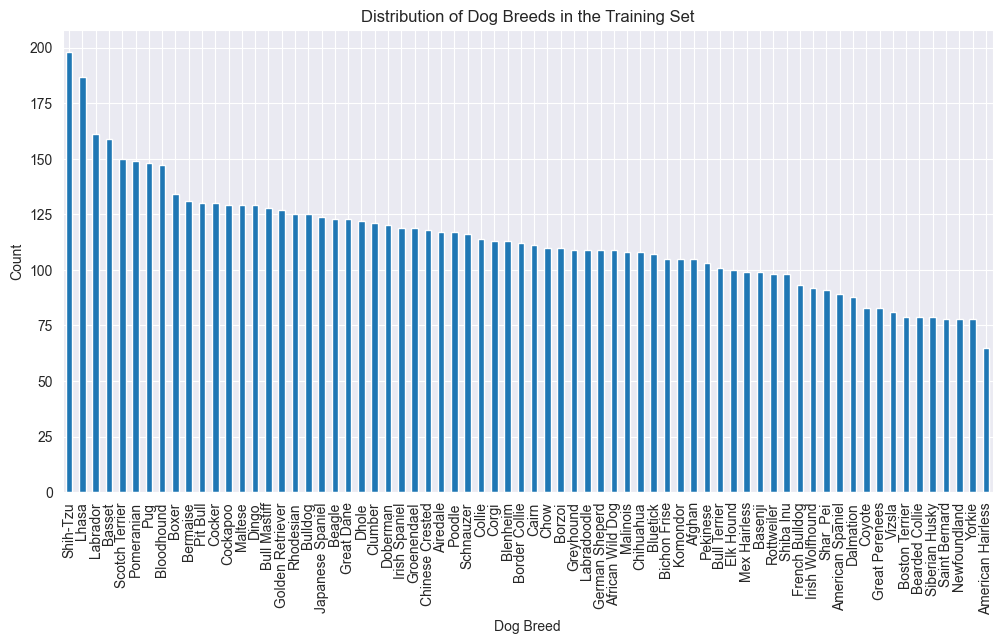

In [34]:
# Check the distribution of dog breeds in the training set
breed_counts = train_df['labels'].value_counts()
breed_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Dog Breeds in the Training Set')
plt.xlabel('Dog Breed')
plt.ylabel('Count')

plt.savefig(r"..\..\output\exploration\dataset_2\Distribution_Dog_Breeds_in_Training")
plt.show()

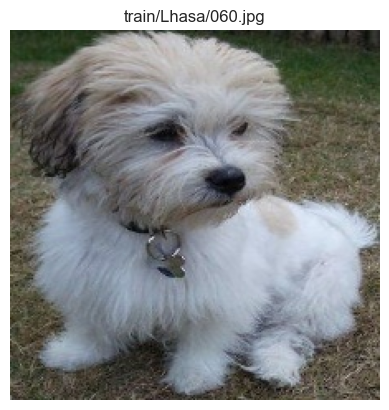

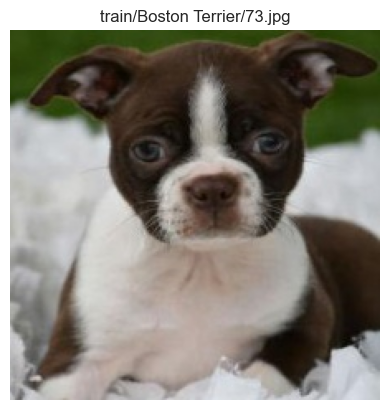

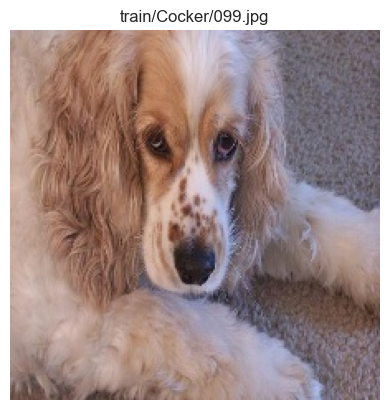

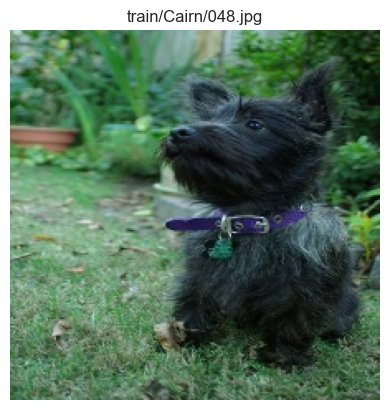

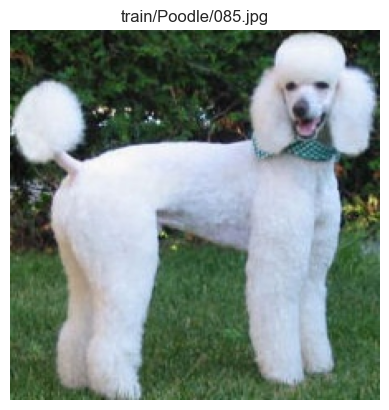

In [45]:

# Display a few sample images from the training set
sample_images = random.sample(list(train_df['filepaths']), 5)

for img_path in sample_images:
    img = cv2.imread(os.path.join(r"..\..\data\raw\dataset_2", img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(img_path)
    plt.axis('off')
    plt.show()


In [42]:
random.sample(list(train_df['filepaths']), 5)

['train/Komondor/056.jpg',
 'train/Vizsla/66.jpg',
 'train/American Spaniel/40.jpg',
 'train/Labradoodle/104.jpg',
 'train/Doberman/048.jpg']

# Calculate the Number of Images in Each Split

In [50]:
# Calculate the number of images in each split
image_counts = data_df['data set'].value_counts()

# Create a new DataFrame to make plotting easier
counts_df = pd.DataFrame({'split': image_counts.index, 'count': image_counts.values})

# Display the new DataFrame
print(counts_df)


   split  count
0  train   7946
1   test    700
2  valid    700


# Plot Bar_plot and Histogram

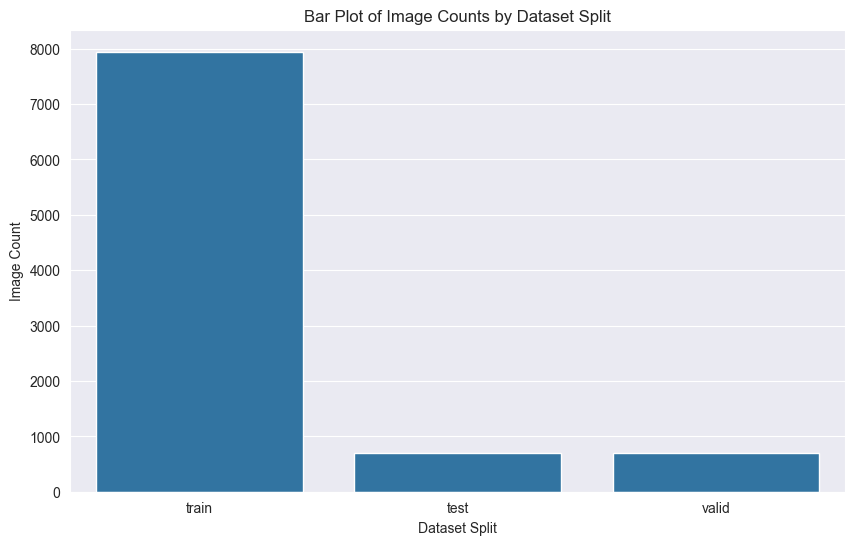

In [55]:
import seaborn as sns
# Bar plot for the count of images in each dataset split
plt.figure(figsize=(10, 6))
sns.barplot(x='split', y='count', data=counts_df)
plt.title('Bar Plot of Image Counts by Dataset Split')
plt.xlabel('Dataset Split')
plt.ylabel('Image Count')

plt.savefig(r"..\..\output\exploration\dataset_2\Barplot_image_count.png")
plt.show()


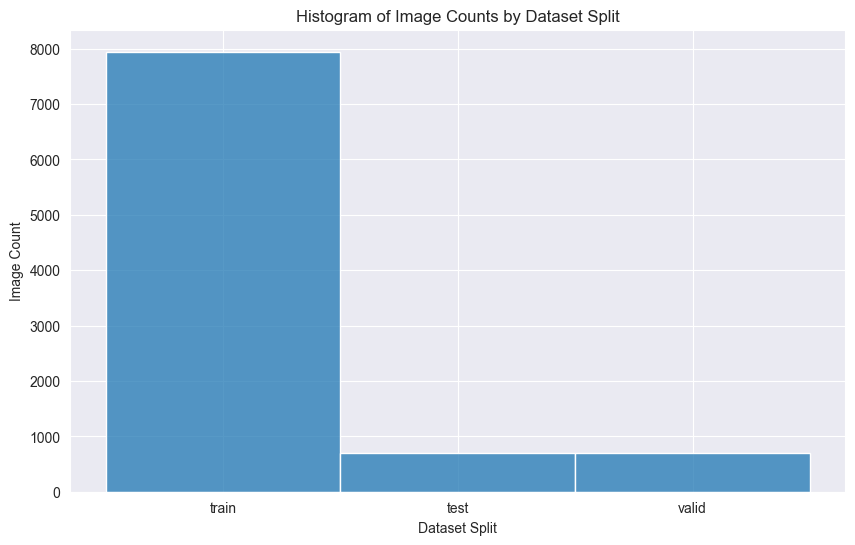

In [60]:
# Histogram of image counts by dataset split
plt.figure(figsize=(10, 6))
sns.histplot(data=data_df, x='data set', kde=False, bins=3)
plt.title('Histogram of Image Counts by Dataset Split')
plt.xlabel('Dataset Split')
plt.ylabel('Image Count')


plt.savefig(r"..\..\output\exploration\dataset_2\Histogram_image_count.png")
plt.show()


  data set             labels  count
0     test             Afghan     10
1     test   African Wild Dog     10
2     test           Airedale     10
3     test  American Hairless     10
4     test   American Spaniel     10


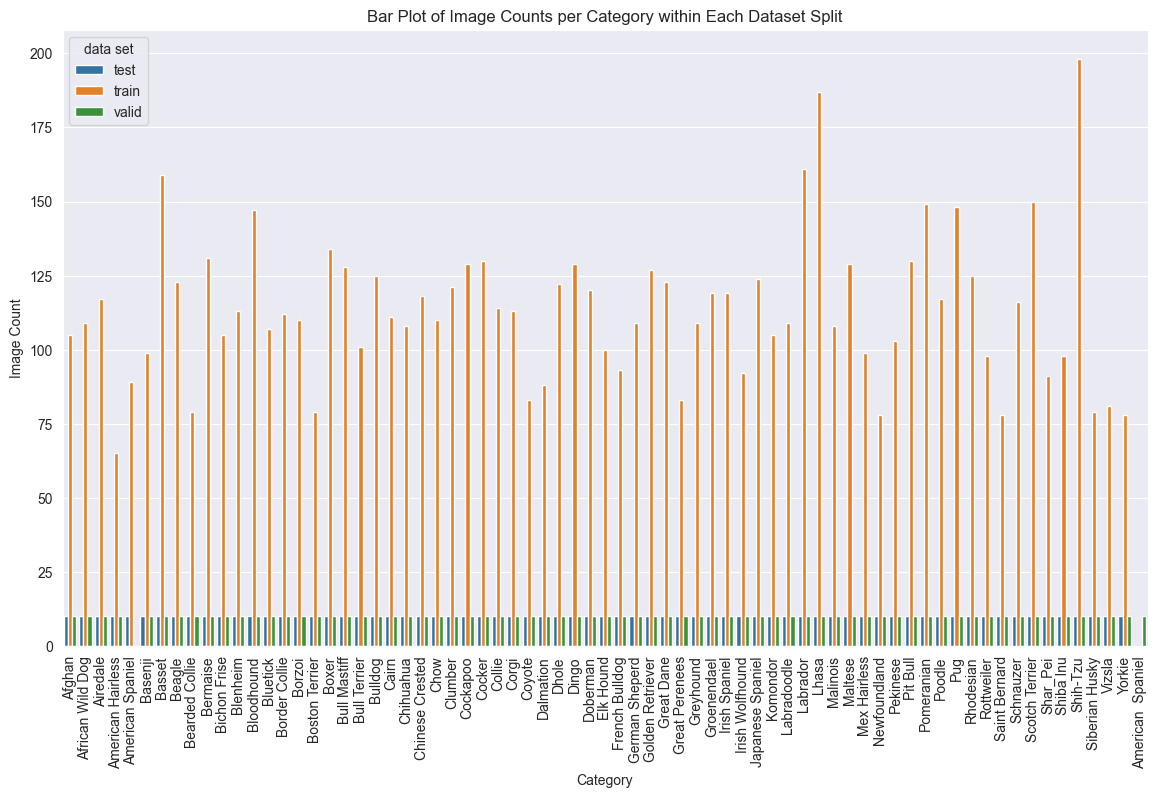

In [58]:
# Calculate the number of images per category in each split
category_counts = data_df.groupby(['data set', 'labels']).size().reset_index(name='count')

# Display the new DataFrame
print(category_counts.head())

# Plot the distribution of image counts per category within each split
plt.figure(figsize=(14, 8))
sns.barplot(x='labels', y='count', hue='data set', data=category_counts)
plt.title('Bar Plot of Image Counts per Category within Each Dataset Split')
plt.xlabel('Category')
plt.ylabel('Image Count')
plt.xticks(rotation=90)

plt.savefig(r"..\..\output\exploration\dataset_2\Bar_plot_Image_count_per_Category_Each_Dataset.png")
plt.show()


In [61]:
category_counts

,data set,labels,count
0,test,Afghan,10
1,test,African Wild Dog,10
2,test,Airedale,10
3,test,American Hairless,10
4,test,American Spaniel,10
...,...,...,...
205,valid,Shiba Inu,10
206,valid,Shih-Tzu,10
207,valid,Siberian Husky,10
208,valid,Vizsla,10


# Heat_map

In [64]:
# Pivot the data to create a matrix for the heatmap
heatmap_data = category_counts.pivot(index='labels', columns='data set', values='count').fillna(0)

# Display the new DataFrame
print(heatmap_data.head())

data set           test  train  valid
labels                               
Afghan             10.0  105.0   10.0
African Wild Dog   10.0  109.0   10.0
Airedale           10.0  117.0   10.0
American  Spaniel   0.0    0.0   10.0
American Hairless  10.0   65.0   10.0


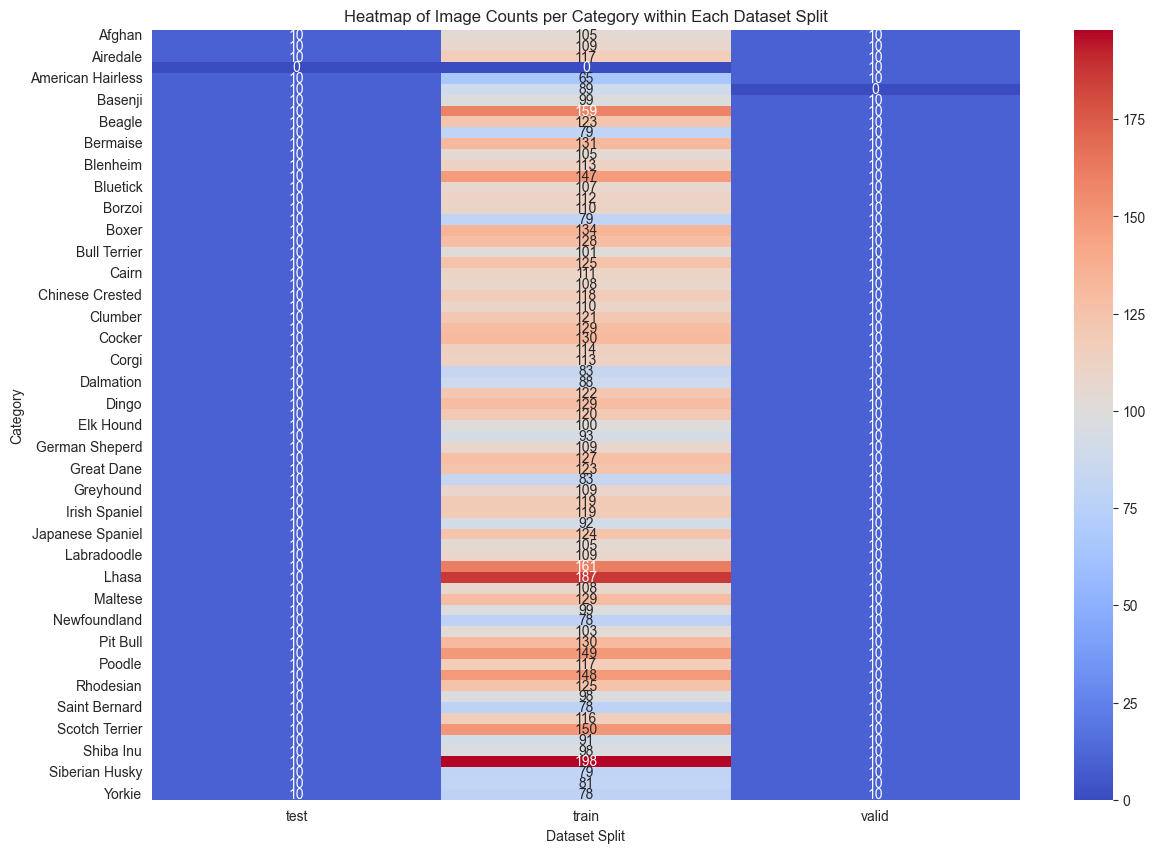

In [68]:
# Plot the heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm")
plt.title('Heatmap of Image Counts per Category within Each Dataset Split')
plt.xlabel('Dataset Split')
plt.ylabel('Category')



plt.savefig(r"..\..\output\exploration\dataset_2\Heatmap_Image_Count_Per_Category_Each_Dataset_Split.png")
plt.show()
